In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
bos.columns=boston.feature_names

In [4]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos['Price']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [7]:
y=bos['Price']
X = bos.drop(['Price'],axis=1)
print(X.shape,y.shape)

(506, 13) (506,)


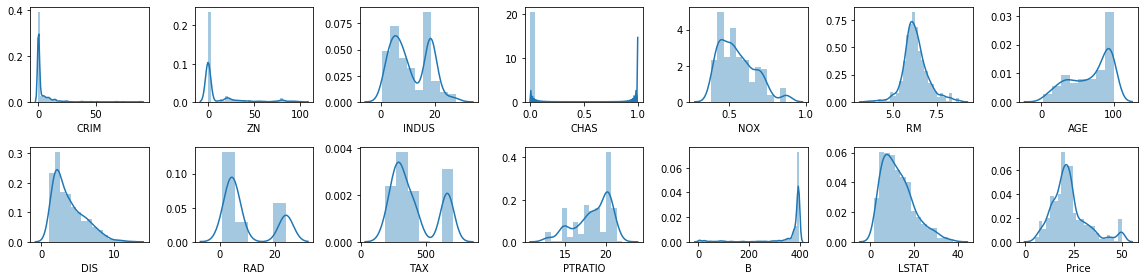

In [8]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize = (16,4))

col = bos.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(bos[col[index]], ax = ax[i][j])
        index = index + 1

plt.tight_layout()

In [9]:
scaler =StandardScaler()

X= scaler.fit_transform(X)

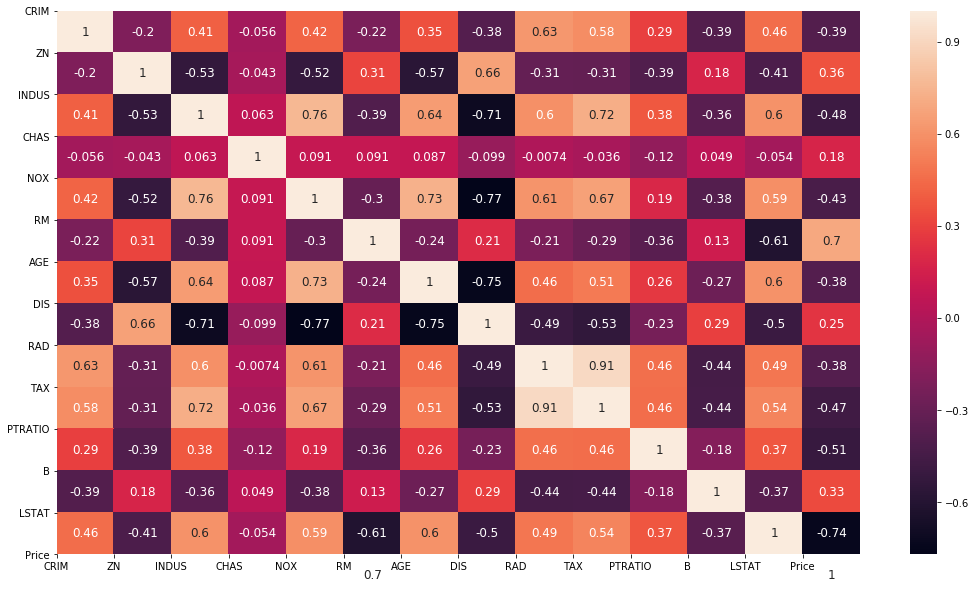

In [10]:
corr = bos.corr()

fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corr, annot = True, annot_kws={'size': 12})

plt.xticks(range(len(corr.columns)), corr.columns);

plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [13]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(354, 13) (152, 13)
(354,) (152,)


## Linear Regression 

In [14]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print("R2 Score For Training Data: ",regressor_linear.score(X_train, y_train))
print("R2 Score For Testing Data: ",regressor_linear.score(X_test, y_test))

R2 Score For Training Data:  0.770494124075238
R2 Score For Testing Data:  0.6685538790447974


## Lasso Regularization

In [16]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [17]:
alpha = lasscv.alpha_
alpha

0.0010503639627308136

In [18]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0010503639627308136, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
lasso_reg.score(X_test, y_test)

0.6684334167493406

#### This R2 Score is 66.83% - same as Before. So there is no overfitting 

## Ploynomial Regression with Degree 2

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



# R2 Score the Train set results
y_train_poly2 = regressor_poly2.predict(X_poly)
train_score = r2_score(y_train, y_train_poly2)

#  R2 Score the Test set results
y_test_poly2 = regressor_poly2.predict(poly_reg.fit_transform(X_test))
test_score = r2_score(y_test, y_test_poly2)



rmse_poly2 = np.sqrt(mean_squared_error(y_test, y_test_poly2))

print('Train Score: ', train_score)
print('Test Score: ', test_score)
print("RMSE: ", rmse_poly2)




Train Score:  0.927362215521367
Test Score:  0.8578675994312708
RMSE:  3.810965952665456


In [25]:
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

In [26]:
print ("Cross Validation Score", cv_poly2.mean())

Cross Validation Score 0.7179293152481062
